In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Import the data

df = pd.read_csv("Resources/lending_data.csv", encoding="utf-8", low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


In [4]:
df["loan_status"].value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

In [5]:
df.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


In [9]:
for col in df.columns:
    print(f"{col} \n\n {df[col].value_counts()}\n\n")

loan_size 

 9600.0     2596
9800.0     2522
9400.0     2511
9200.0     2491
9700.0     2475
           ... 
14300.0       1
13700.0       1
5100.0        1
23800.0       1
23400.0       1
Name: loan_size, Length: 182, dtype: int64


interest_rate 

 7.115     81
7.211     78
7.207     76
7.018     75
7.204     75
          ..
11.078     1
12.551     1
11.496     1
9.661      1
10.068     1
Name: interest_rate, Length: 4692, dtype: int64


borrower_income 

 48300    680
46800    664
48400    663
47800    655
46600    654
        ... 
71500      1
31300      1
94800      1
32000      1
96900      1
Name: borrower_income, Length: 662, dtype: int64


debt_to_income 

 0.378882    680
0.358974    664
0.380165    663
0.372385    655
0.356223    654
           ... 
0.580420      1
0.041534      1
0.683544      1
0.062500      1
0.690402      1
Name: debt_to_income, Length: 662, dtype: int64


num_of_accounts 

 4     24669
3     24339
5     10973
2     10394
6      2046
1      1908
12      

In [10]:
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

target_names=["bad risk", "good risk"]

In [11]:
print(f"Shape: {X.shape} {y.shape}")

Shape: (77536, 7) (77536,)


In [12]:
# Split the data into X_train, X_test, y_train, y_test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [13]:
# Train a Logistic Regression model print the model score

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier

LogisticRegression()

In [14]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [15]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9921240885954051
Testing Data Score: 0.9918489475856377


In [16]:
from sklearn.metrics import confusion_matrix, classification_report

y_true = y_test
y_pred = classifier.predict(X_test)

# print(confusion_matrix(y_true, y_pred))

print(classification_report(y_true, y_pred, target_names=target_names)) 

              precision    recall  f1-score   support

    bad risk       1.00      0.99      1.00     18765
   good risk       0.85      0.91      0.88       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



In [17]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

accuracy = (tp + tn) / (tp + fp + tn + fn) 
print(f"Accuracy: {accuracy}")

Accuracy: 0.9918489475856377


# Let's Try Random Forest Classifier

In [18]:
# Train a Random Forest Classifier model and print the model score

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)

print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')
print(classification_report(y_test, y_pred, target_names=target_names))

Training Score: 0.9975409272252029
Testing Score: 0.9917457697069748
              precision    recall  f1-score   support

    bad risk       1.00      0.99      1.00     18765
   good risk       0.85      0.91      0.88       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



[1.29066792e-01 2.74137485e-01 1.74521675e-01 1.58682971e-01
 1.18902531e-01 8.06639163e-05 1.44607881e-01]


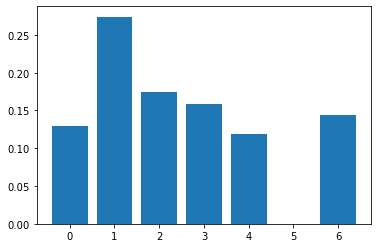

In [20]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [21]:
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([False,  True,  True,  True, False, False,  True])

In [22]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)

scaler = StandardScaler().fit(X_selected_train)

X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

C:\Users\vannx\anaconda3\envs\PythonData38\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [23]:
clf = LogisticRegression().fit(X_train_scaled, y_train)

print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9942908240473243
Testing Score: 0.9936545604622369


In [24]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9942908240473243
Testing Score: 0.9936545604622369
